In [1]:
# 1) a) ii)
f = lambda x: 1/(1-x)
print(f(1-10**-13))
print(10**13)

9996891514695.885
10000000000000


In [2]:
abs(f(1-10**-13)-10**13)

3108485304.1152344

In [32]:
iv1 = f(1-2**-43)
iv2 = 1/2**-43
print(iv1)
print(iv2)

8796093022208.0
8796093022208.0


In [33]:
# 2) a) 
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import math

Text(0.5, 1.0, 'Not-a-Not Cubic Spline')

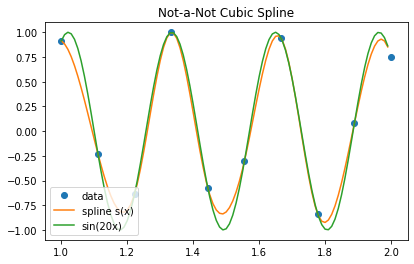

In [34]:
xspread = np.random.rand(10**5)*0.98+1.01
xNodes = np.linspace(1,2,10)
yNodes = np.sin(20*xNodes)
sNak = CubicSpline(xNodes,yNodes,bc_type="not-a-knot")
sNat = CubicSpline(xNodes,yNodes,bc_type="natural")

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(xNodes, yNodes, 'o',label='data')

xs = np.arange(1,2,0.01)
ax.plot(xs,sNak(xs),label='spline s(x)')
ax.plot(xs,np.sin(20*xs),label='sin(20x)')
ax.legend(loc='lower left')
plt.title('Not-a-Not Cubic Spline')


Text(0.5, 1.0, 'Natural Cubic Spline')

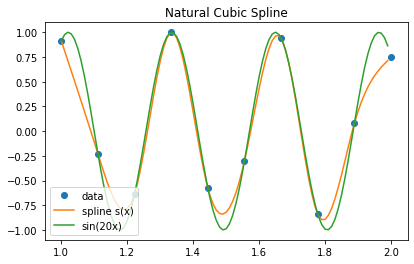

In [35]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(xNodes, yNodes, 'o',label='data')

xs = np.arange(1,2,0.01)
ax.plot(xs,sNat(xs),label='spline s(x)')
ax.plot(xs,np.sin(20*xs),label='sin(20x)')
ax.legend(loc='lower left')
plt.title('Natural Cubic Spline')

In [7]:
np.amax(abs(sNak(xspread)-np.sin(20*xspread)))

0.280372013508966

In [8]:
np.amax(abs(sNat(xspread)-np.sin(20*xspread)))

0.43197141650484117

In [36]:
nVals = np.linspace(2,1000,100) # Values of n 
# If n goes up to ~10^5 linear behavior becomes more apparent on log-log

In [10]:
# Finding the error as a function of n

def splineErrorNatural(n):
    xNodes = np.linspace(1,2,n)
    yNodes = np.sin(20*xNodes)
    sNat = CubicSpline(xNodes,yNodes,bc_type="natural")
    return np.amax(abs(sNat(xspread)-np.sin(20*xspread)))
def splineErrorNotAKnot(n):
    xNodes = np.linspace(1,2,n)
    yNodes = np.sin(20*xNodes)
    sNak = CubicSpline(xNodes,yNodes,bc_type="not-a-knot")
    return np.amax(abs(sNak(xspread)-np.sin(20*xspread)))

In [11]:
errorNat = []
for i in nVals.astype(np.int64):
    errorNat.append(splineErrorNatural(i))

In [12]:
errorNak = []
for i in nVals.astype(np.int64):
    errorNak.append(splineErrorNotAKnot(i))

Text(0, 0.5, 'Max Error')

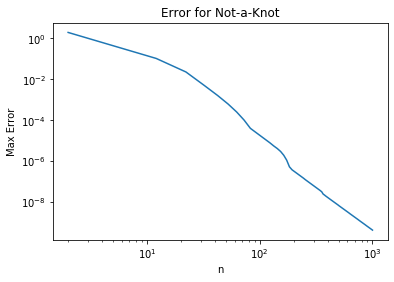

In [13]:
plt.plot(nVals,errorNak)
plt.yscale("log")
plt.xscale("log")
plt.title("Error for Not-a-Knot")
plt.xlabel("n")
plt.ylabel("Max Error")

Text(0, 0.5, 'Max Error')

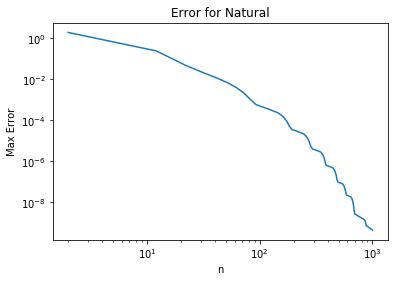

In [14]:
plt.plot(nVals,errorNat)
plt.yscale("log")
plt.xscale("log")
plt.title("Error for Natural")
plt.xlabel("n")
plt.ylabel("Max Error")

In [15]:
# 2) c) 

# new spread from [1,2]
xspreadc = np.random.rand(10**5)+1.0
def splineErrorNaturalc(n):
    xNodes = np.linspace(1,2,n)
    yNodes = np.sin(20*xNodes)
    sNat = CubicSpline(xNodes,yNodes,bc_type="natural")
    return np.amax(abs(sNat(xspreadc)-np.sin(20*xspreadc)))
def splineErrorNotAKnotc(n):
    xNodes = np.linspace(1,2,n)
    yNodes = np.sin(20*xNodes)
    sNak = CubicSpline(xNodes,yNodes,bc_type="not-a-knot")
    return np.amax(abs(sNak(xspreadc)-np.sin(20*xspreadc)))

nValsc = np.linspace(2,1000,100)
errorNatc = []
for i in nValsc.astype(np.int64):
    errorNatc.append(splineErrorNaturalc(i))
    
errorNakc = []
for i in nValsc.astype(np.int64):
    errorNakc.append(splineErrorNotAKnotc(i))

Text(0, 0.5, 'Max Error')

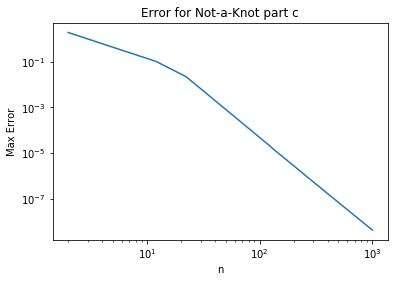

In [16]:
plt.plot(nValsc,errorNakc)
plt.yscale("log")
plt.xscale("log")
plt.title("Error for Not-a-Knot part c")
plt.xlabel("n")
plt.ylabel("Max Error")

Text(0, 0.5, 'Max Error')

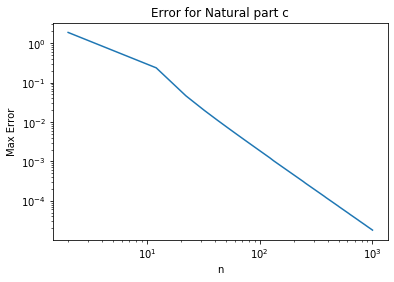

In [17]:
plt.plot(nValsc,errorNatc)
plt.yscale("log")
plt.xscale("log")
plt.title("Error for Natural part c")
plt.xlabel("n")
plt.ylabel("Max Error")

In [28]:
# 2) d) 

def g(xNodes):
    y = []
    for x in xNodes:
        if (x >= 1.3):
            y.append(math.sin(20*(2.6-x)))
        else:
            y.append(math.sin(20*x))
    return y

# new seed for part d
xspreadd = np.random.rand(10**5)+1.0

def splineErrorNaturald(n):
    xNodes = np.linspace(1,2,n)
    # I had previously implemented this using g(x) 
    # (as below) but behavior is same with np.piecewise
    yNodes = np.piecewise(xNodes,[xNodes<1.3,xNodes>=1.3],
                          [lambda xNodes: np.sin(20*xNodes),
                           lambda xNodes: np.sin(20*(2.6-xNodes))])
    sNat = CubicSpline(xNodes,yNodes,bc_type="natural")
    return np.amax(abs(sNat(xspreadd)-g(xspreadd)))
def splineErrorNotAKnotd(n):
    xNodes = np.linspace(1,2,n)
    yNodes = g(xNodes)
    sNak = CubicSpline(xNodes,yNodes,bc_type="not-a-knot")
    return np.amax(abs(sNak(xspreadd)-g(xspreadd)))

In [29]:
nValsd = np.linspace(2,101,100)
errorNatd = []
for i in nValsd.astype(np.int64):
    errorNatd.append(splineErrorNaturald(i))

errorNakd = []
for i in nValsd.astype(np.int64):
    errorNakd.append(splineErrorNotAKnotd(i))

Text(0, 0.5, 'Max Error')

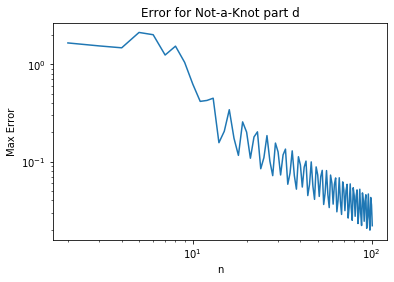

In [30]:
plt.plot(nValsd,errorNakd)
plt.yscale("log")
plt.xscale("log")
plt.title("Error for Not-a-Knot part d")
plt.xlabel("n")
plt.ylabel("Max Error")

Text(0, 0.5, 'Max Error')

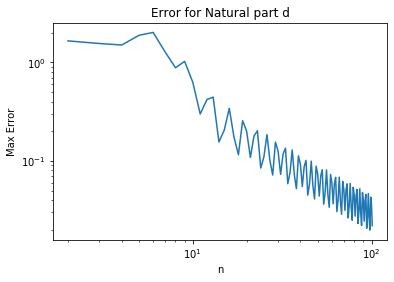

In [31]:
plt.plot(nValsd,errorNatd)
plt.yscale("log")
plt.xscale("log")
plt.title("Error for Natural part d")
plt.xlabel("n")
plt.ylabel("Max Error")

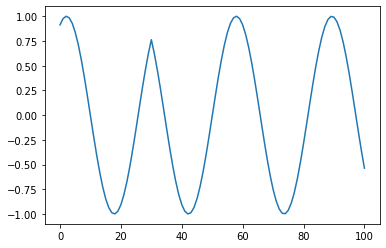

In [27]:
# Plot of g(x) for reference
xd = np.linspace(1,2,101)
yd = np.piecewise(xd, [xd<1.3,xd>=1.3],
                  [lambda xd: np.sin(20*xd),
                   lambda xd: np.sin(20*(2.6-xd))])
plt.plot(yd)